# PCR - Temel Bileşen Regresyonu

Değişkenlere boyut indirgeme uygulandıktan sonra **çıkan bileşenlere** regresyon modeli kurulması fikrine dayanır.

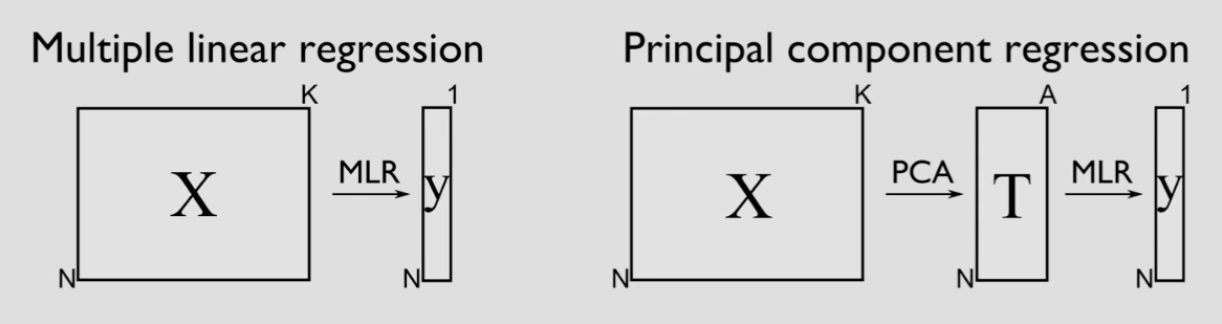

- çoklu doğrusal regresyon: bağımsız değişkenler üzerinden bir model kurulup y tahminleri elde ediliyor.
- temel bileşen regresyonu: değişkenlere önce bir boyut indirgeme uygulanır ve bu boyut indirgeme sonrasında çıkan bileşenler üzerinden bir regresyon modeli kurulur.
- birçok gerçek hayat probleminde üzerinde çalışıyor olduğumuz veri setinin bağımsız değişkenleri birbirleriyle yüksek korelasyona sahip olabiliyor ve benzer tahminsel bilgileri barındırdıkları anlamına gelir. değişkenler arasında yüksek korelasyon olması regresyon bölümünde ifade ettiğimiz çoklu doğrusal bağlantı problemi adı verilen bir probleme sahip olmaktadır. 
- çoklu doğrusal bağlantı problemi olursa en küçük kareler yöntemiyle tahmin etme işlemi parametrelere ulaşma işlemi bu ekk tahmincilerin yani katsayıların varyansını arttırmakta ve yanlılık yaratmaktadır.
- gerçek hayat veri setlerinde bazen değişken sayısının gözlem sayısından fazla olabiliyor. bu da çok boyutluluk laneti olarak adlandırılır.
- bu çoklu doğrusal bağlantı problemi ve çok boyutluluk laneti gibi durumlarda ekk tahmincileri yanlılıklar ortaya çıkarmış oluyor. eğer bu varsayımlar sağlanmıyorsa bu durumlar sağlanmıyorsa bu durumda bazı alternatifler geliştirilmeye başlanıyor. bu alternatiflerden birisi temel bileşen regresyonu 
- temel bileşenin üzerine regresyon kurulması
- temel bileşen analizi(PCA), elimizde p adet değişken olduğunda bu p adet değişkenin örneğin içerdiği bilginin yüksek bir kısmının ondan daha az sayıda bir değişken bileşen ile ifade edilmesidir. örneğin elimizde 100 tane değişken olsun bu 100 tane değişkenin içerdiği bir bilgi var. bu 100 değişkenin içerdiği bilgiyi 10dan daha az sayıda değişken ile bu bilginin maksimumunu temsil etmeye çalışmaktır. örneğin 2 bileşenli
- 100 tane değişken var ben bu 100 değişkenin taşıdığı bilgiyi bir miktar bilgi kaybını göze alarak 2 bileşene indirgenir (bu bileşenlerin veri setindeki bilginin büyük bir kısmını taşıdığını varsayarak)
- PCA boyut indirgemesi yaklaşımıdır. 
- 2 bileşenli, 3 bileşenli ifade edebiliyorsam bu duruma temel bileşen analizi/çıkarımı ismi verilir.
- temel bileşen analizinin bu yaklaşımı öncelikle gerçekleştirilip yani p adet bağımsız değişkenin taşıdığı bilgi daha az sayıda örneğin 2, 3 sayıda değişken ile temsil edildikten sonra ortaya çıkan 2 ya da 3 bileşen/değişen 
- işte bu bileşenlere bir regresyon modeli uygulandığında buna temel bileşen regresyonu denmiş oluyor. 


* çoklu linear regresyonda bir bağımsız değişken uzayımız vardı bunlara direk regresyon uyguluyorduk
* PCR, bağımsız değişken uzayını indirgeyip bunun çıkan bileşenlerinin üzerine uyguluyoruz
* bu durumun daha önce bahsetmiş olduğumuz iki problemli çok boyut laneti ve çoklu doğrusal bağlantı problemine getirdiği çözüm çok boyutluluk lanetini ortadan kaldıran bir durum söz konusu 2-5 bileşene indirgendiğinden dolayı çok boyutluluk laneti ortadan kalkıyor
* burada oluşan bileşenler birbirleriyle korelasyonlu olmuyor 
* temel bileşen analiziyle bağımsız değişken boyutu indirgendiğinde ortaya çıkan bileşenler birbiriyle bağımsız değişkenler olmuş oluyor bu durumda da çoklu doğrusal bağlantı problemi ortadan kalkmış oluyor 

# PCR Model

In [1]:
import pandas as pd

In [2]:
hit = pd.read_csv("Hitters.csv")

In [3]:
df = hit.copy()
df = df.dropna() # eksik gözlemler var. bu gözlem birimlerini sildim.

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

263 tane gözlem birimi var.
kategorik değişkenler object veri tipinde diğerleri ise sürekli değişkenler

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


- veri seti amerikan basketbol ligi, basketbol oyuncularının bazı bilgilerini barındıran bir veri seti
- Hits: bir önceki yıl atılan basket sayısı
- Years: deneyim yılı
- Salary: hedef değişken, bağımlı

veri setinin boyutu çok büyük olduğundan fazla değişkenden oluştuğundan ön işleme yapalım. örneğin buradaki kategorik değişkenleri dummy değişken formatına dönüştürmemiz gerekiyor.  

In [7]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


şu anda bu kategorik değişkenler için one hat encoding işlemi gerçekleştirmiş olduk fakat görülecektir ki burada dummy değişken tuzağına düşme söz konusu ve dolayısıyla yapacak olduğumuz iş buradaki 2. olarak tekrar eden bütün değişkenleri bu veri setinden çıkarmak

In [8]:
y = df["Salary"] # bağımlı değişkeni

In [9]:
# bu veri seti içerisinden bağımlı değişkeni ve dummpy değişkene çevirdiğim değişkenlerin ilk halini çıkardım
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
# kalan sütunların veri tipleri "float64" veri tipine dönüştürülüyor.
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [10]:
# dummy değişkenleri birleştirelim ve bağımsız değişken DataFrame oluşturalım
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


- X, bağımsız değişkenlerimizi ifade ediyor. DataFrame
- y ise bağımlı değişkenimizi(Salary) ifade ediyor

PCR modelini kuralım

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [12]:
# veri setini test ve train olarak ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [13]:
X_train.shape

(197, 19)

In [14]:
y_train.shape

(197,)

In [15]:
X_test.shape

(66, 19)

In [16]:
y_test.shape

(66,)

In [17]:
training = df.copy()
training.shape

(263, 20)

* sklearn PCR'ın direk uygulamasını barındırmadığı için bunu kendimiz uygulamalıyız
* bunu uygulamak için öncelikle PCA gerçekleştirmeliyiz
* bulduğumuz PCA üzerine kendimiz bir regresyon modeli oturtturup PCR uygulamasını gerçekleştireceğiz

In [18]:
# verinin ölçeklendirilmesi ve bileşenlerin oluşturulması
from sklearn.decomposition import PCA
pca = PCA() # model nesnesini oluşturduk
# parantez içerisine bileşen sayısı yazılır. 
# bunu girmedik çünkü değişken sayısı kadar bileşen oluşması için

In [19]:
# indirgenmiş X
from sklearn.preprocessing import scale # ölçeklendirme işlemi
X_reduced_train = pca.fit_transform(scale(X_train))

- scale(X_train): Verilerin ölçeklenmesi işlemidir. Bu, her özelliği (sütunu) ortalama 0 ve standart sapma 1 olacak şekilde ölçeklendirir. Ölçeklendirme, farklı özelliklerin farklı ölçeklerde olması durumunda modelin daha iyi çalışmasına yardımcı olabilir.

değişken sayısı kadar bileşen oluşturulmuş fakat aralarındaki bağlantı problemi ortadan kalkmış indirgenmiş bir veri seti var

veri seti üzerinden incelemeler yapalım, doğrulayalım. sonra denemeler yapalım.

burada sadece fit fonksiyonuda kullanılabilir. model nesnesi oluşur. biz transform ile oluşturduk ki hem x'e göre model oluşacak hemde boyut indirgeme işlemi yapılacak sadece transform fonksiyonu ise x boyut indirgeme işlemi yapar bu fonksiyonda aslında 2 işi birden yapmış oluyoruz. fit_transform

In [20]:
# pca ile boyut indirgemesi yapıyoruz, bileşenler oluşuyor
# ön tanımlı argümana dokunmadık değişken sayısı kadar bileşen oluştu

In [21]:
# 1. gözlem birimi ve tüm bileşenleri
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [22]:
# 1. gözlem biriminin 1. bileşeni
X_reduced_train[0:1,0:1]

array([[-2.49569913]])

In [24]:
import numpy as np

In [25]:
# ilk 10 bileşen ve bu bileşenlerce
# kümülatif olarak açıklanan varyansı inceleyelim
# cumsum: kümülatif sum
# explained_variance_ratio_: açıklanan varyans oranı
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

- birinci bileşenin veri setinde bulunan toplam değişkenliğin yani varyansın %38'ini açıkladığı görülüyor.
- ikinci bileşenin birinci bileşenle birlikte açıkladığı varyans %60 civarında
- bileşen sayısı arttıkça orijinal veri setinin içindeki varyansı açıklama oranlarının arttığı gözlemlenir. veri setimizde örneğin 19 tane değişken vardı fakat 10 değişkeni gösterdik 10 değişkende daha 10. değişkene geldiğinde zaten veri setinin içerisindeki değişkenliğin %97sini açıklıyoruz

In [26]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

5.değişkene geldiğimizde veri setinin içerisindeki değişkenliğin %84ünü açıklıyoruz. dolayısıyla burada temel bileşen analizinin temel mantığı veri setini daha az sayıda bileşene indirgemekti. 19 değişkeni aldık burada istersek 19 değişkeni 19 bileşenle, istersek 5 bileşenle istersek 8, 10 bileşenle temsil edebiliyoruz.

her koşulda seçmiş olduğumuz bileşen sayısıyla, bu bileşen sayısının üstüne modeli kurduğumuzda model kurma işlemini gerçekleştirmiş oluyoruz.

Kodun çıktısı olarak elde edeceğiniz dizi, ilk 10 bileşen için açıklanan varyansın kümülatif toplamını içerecektir. Bu toplam, veri setinizin ne kadarının bu bileşenler tarafından açıklandığını gösterir. 

Bu çıktıları inceleyerek, veri setinizdeki değişkenliğin belirli bir sayıda temel bileşen kullanarak nasıl açıklandığını ve hangi bileşen sayısının yeterli olduğunu belirleyebilirsiniz. Örneğin, ilk 3 veya 4 bileşeni kullanarak veri setinizdeki toplam değişkenliğin büyük bir bölümünü yakalayabilirsiniz.

PCA analizi sırasında elde edilen açıklanan varyans, veri setinizdeki değişkenliğin her bir temel bileşen tarafından ne kadar iyi açıklandığını gösterir. Temel bileşenler, orijinal veri boyutunu daha düşük boyutlara indirgeyerek veri setinizdeki deseni ve değişkenliği sıkıştıran yeni değişkenlerdir.

Daha spesifik olarak:

1. **Bileşenlerin Önemi**: Açıklanan varyans, her bir temel bileşenin orijinal veri setindeki değişkenliği ne kadar iyi yansıttığını gösterir. Büyük açıklanan varyans değerleri, temel bileşenlerin veri setinizdeki önemli değişkenlik yüzdesini taşıdığını gösterir. Bu, hangi temel bileşenlerin daha fazla bilgi taşıdığını anlamanıza yardımcı olur.

2. **Boyut Azaltma ve Özetleme**: Temel bileşen analizi, veri setindeki boyutu azaltarak verinin daha öz ve anlamlı bir temsilini sağlar. Açıklanan varyans, veri setinizdeki toplam değişkenliğin ne kadarının seçtiğiniz temel bileşenlerle korunduğunu gösterir. Bu, gereksiz veya düşük varyanslı bileşenleri atlayarak veriyi daha öz ve anlamlı bir şekilde özetlemenize yardımcı olur.

3. **Bileşen Seçimi**: Açıklanan varyans oranları, hangi bileşenleri seçeceğinizi veya kaç bileşeni kullanmanız gerektiğini belirlemede size rehberlik eder. Örneğin, ilk birkaç temel bileşen, toplam varyansın büyük bir kısmını açıklıyorsa, daha düşük boyutlu bir temsil elde etmek için bu bileşenleri seçebilirsiniz.

Genel olarak, açıklanan varyans analizi, veri setinin temel bileşenlerle ne kadar iyi özetlenebileceğini ve bu bileşenlerin hangi sıralamada ne kadar önemli olduğunu anlamak için kullanılır. Bu analiz, boyut azaltma, veri görselleştirme ve gereksiz bilgiyi atlayarak verinin daha özlü bir temsilini elde etme gibi birçok veri analitiği uygulamasında önemli bir rol oynar.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
# indirgenmiş veri seti üzerine doğrusal regresyon fit ettik
pcr_model = lm.fit(X_reduced_train, y_train)

In [31]:
# const, sabit
pcr_model.intercept_

543.4834416243655

In [32]:
# katsayılar
# 19 değişkenin 19 tane katsayısı
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

veri setini 19 tane değişken varken boyutunu indirgedik. indirgediğimiz boyut üzerinden, indirgenmiş veri seti üzerine (X_reduced_train) bir doğrusal regresyon fit ettik(lm.fit)

# PCR Model - Tahmin

In [33]:
# y tahmin değerleri
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# değerlendirmelerimizi train - test üzerinden yapalım

In [36]:
# train setimiz için rmse hatası
np.sqrt(mean_squared_error(y_train, y_pred))

289.32928255649756

In [37]:
df["Salary"].mean()

535.9258821292775

In [40]:
r2_score(y_train, y_pred)

0.577007525041018

#### Test Hatası

(model tuning işlemlerinde validasyon yöntemlerini ele alacağız)

In [42]:
pca2 = PCA()

In [43]:
X_reduced_test = pca2.fit_transform(scale(X_test))

hatayı hesaplamak için bu indirgemiş olduğum test veri seti (X_reduced_test) üzerinden tahmin edilen y değerlerini (y_pred) hesaplayalım

In [44]:
# y tahmin değerleri
y_pred = pcr_model.predict(X_reduced_test)

eğitim seti üzerinden kurmuş olduğum modeli(pcr_model) kullanarak test setinin x değerlerini (X_reduced_test) modele yerleştirip y'nin tahmin edilen değerlerini (y_pred) elde ettim.

In [45]:
# test seti için hata hesaplama işlemleri
# rmse
np.sqrt(mean_squared_error(y_test, y_pred)) # test hatası

405.1575364149966

# PCR Model - Model Tuning

pcr ile indirgenen tüm bileşenleri kullanarak hesaplamalar yaptık fakat farklı bileşen sayılarında farklı sonuçlar elde edebiliriz. pcr'in optimize edilmesi gereken hiperparametresi, dışsal parametresi, model hiperparametresi buradaki bileşen sayısıdır.

bütün bileşenlerle model kurduk.

model tuning işlemi için öncelikle bütün bileşenlerle kurulan modelin test hatasına tekrar bakalım: 405

In [50]:
lm = LinearRegression()

In [52]:
# X_reduced_train: train, eğitim seti
# bütün gözlem birimlerinin sadece 1. bileşenini al
pcr_model = lm.fit(X_reduced_train[:,0:1], y_train)

In [53]:
# tahmin yaparkende test setini aynı ayara getirelim yoksa boyut hatası olur
y_pred=pcr_model.predict(X_reduced_test[:,0:1])
# tek bileşenli temel bileşen regresyon modeli kurma işlemi gerçekleştirdik

In [54]:
# tek bileşenli elde ettiğimiz hata
np.sqrt(mean_squared_error(y_test, y_pred))

392.3893558949347

örneğin birkaç bileşenle model kurmuş olduğumuzu düşünüp nasıl test hataları almış olabileceğimizi birlikte gözlemleyeceğiz

In [55]:
# X_reduced_train: train, eğitim seti
# bütün gözlem birimlerinin sadece 1 ve 2. bileşenini al
pcr_model = lm.fit(X_reduced_train[:,0:2], y_train)

In [56]:
# tahmin yaparkende test setini aynı ayara getirelim yoksa boyut hatası olur
y_pred=pcr_model.predict(X_reduced_test[:,0:2])
# iki bileşenli temel bileşen regresyon modeli kurma işlemi gerçekleştirdik

In [57]:
# iki bileşenli elde ettiğimiz hata
np.sqrt(mean_squared_error(y_test, y_pred))

396.3876124796765

In [61]:
# X_reduced_train: train, eğitim seti
# bütün gözlem birimlerinin sadece ilk 10 bileşenini al
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)

In [62]:
# tahmin yaparkende test setini aynı ayara getirelim yoksa boyut hatası olur
y_pred=pcr_model.predict(X_reduced_test[:,0:10])
# 10 bileşenli temel bileşen regresyon modeli kurma işlemi gerçekleştirdik

In [63]:
# 10 bileşenli elde ettiğimiz hata
np.sqrt(mean_squared_error(y_test, y_pred))

390.7914255682223

bileşen sayısı arttıkça 392, 396, 390, 405 şeklinde ilerliyor. 
görüldüğü üzere kullanıcı dışarıdan ayarlamış olduğu birbirinden farklı bileşen sayısı parametresini değiştirdiğinde bu durumda birbirinden farklı hatalar elde edilebilmektedir.
işte model tuning'i hiperparametre optimize etme işlemini cross validation yöntemiyle olası bileşen sayısı değerlerini bir array olarak, bir vektör olarak gönderip bunların denenip en güzel sonucun gelmesi sonrasında optimum bileşen sayımızı belirleme işlemi yapmış olacağız

In [66]:
from sklearn import model_selection

In [67]:
# 10 katlı cross validation yapılandırılması
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)
# shuffle: gruplara ayrılmadan önce verilerin karıştırılıp karıştırılmayacağı bilgisini taşır

In [68]:
lm = LinearRegression()

In [69]:
RMSE = []

her bir bileşen sayısı için oluşturulacak modeller ile cross validation'a göre train hatası hesaplanacak ve bir kaydetme işlemi gerçekleşecek bunun sonunda bu sonuçları görselleştirip değerlendirip (brute force yöntemi) bu PCR için en uygun bileşen sayısının ne olduğuna karar vermiş olacağız

* her bir bileşen sayısı için model kuracak
* her bir bileşen sayısı için k-katlı cross validation uygulayıp buradaki hata değerlerini elde edip
* daha sonra hangi bileşen sayısının daha az hata oluşturduğu bilgisini sunmuş olacak

In [71]:
for i in np.arange(1, X_reduced_train.shape[1] + 1): # ekadar
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       # her seferinde bir sütun daha ekleyerek işlem yapacaktır.
                                                      X_reduced_train[:,:i],
                                                       # Eğitim verisinin hedef (çıktı) değerlerini düzleştirilmiş bir vektör olarak temsil eder.
                                                      y_train.ravel(),
                                                      cv=cv_10,
                                                       # Daha yüksek değerler, daha kötü performansı temsil eder.
                                                      scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

sklearn'nün kendi içerisinde native PCR desteği olmadığından hiperparametre optimizasyonu işlemini brute force yöntemiyle bir döngü yazarak rmse değerlerini her bir olası bileşende değerlendirerek bu işlemi yapacağım.

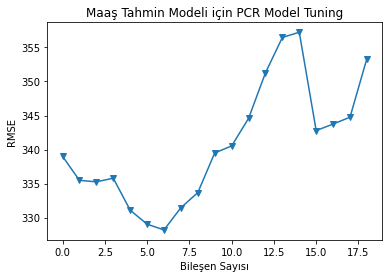

In [73]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
# -v parametresi, noktaların çizgi üzerinde görünmesini sağlar (noktalı çizgi grafiği).
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli için PCR Model Tuning');

Bileşen sayısı **6**

* y ekseninde hata kareler ortalamasının karekökü değeri var.
* x ekseninde bileşen sayısı var.
* optimum bileşen sayısının kaç olması gerektiğini cross validation yöntemi ve train setini kullanarak 
* cross validation yöntemiyle doğrulamayı ve bileşen sayısını seçmeyi
* bileşen sayısını belirledik

bu model hiperparametresini tahmin ettiğimiz değeriyle daha doğrusu optimum bulmuş olduğumuz değeriyle final modelini oluşturmalıyız.

optimum bileşen sayısıyla final modelini oluşturmalıyız.

### Eğitim seti için

In [74]:
lm = LinearRegression()

In [75]:
# modeli kurarken artık indirgenmiş veri seti üzerinden, bileşen sayısını ilk 6 olarak aldım.
pcr_model = lm.fit(X_reduced_train[:, 0:6], y_train) # pcr modelini kurdum

In [76]:
# y tahmin değerleri
y_pred = pcr_model.predict(X_reduced_train[:, 0:6])

In [77]:
# rmse
np.sqrt(mean_squared_error(y_train, y_pred))

308.82659830945005

### Test seti için

In [78]:
# test setine ilişkin y tahmin değerleri oluşacak
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

393.1198700096223

genelde beklentimiz modelin tun edilmeden önceki ortaya koyduğu test hatasıyla tun edildikten sonra bizim hesapladığımız test hatası karşılaştırıldığında bizim hesapladığımız ve tun edilmiş modelin test hatasının daha aşağıda çıkmasını bekleriz.

fakat eğer elimizdeki test ve train değerlendirme işlemlerinde valide edilmiş skorlar üzerinden bu işlemi yapıyorsak bu durumda bu beklenti daha sağlıklı olacaktır.

öncelikle her zaman ilkel bir train ve test hatası hesaplayacağız bu elde ettiğimiz train ve test hatasını daha doğru değerlendirebilmenin yolu cross validation yöntemiyle bunları incelemekti. işte elde ettiğimiz ilk train ve test hatasını cross validation yöntemiyle bir daha göz önünde bulundurduğumuzda elimize daha doğru hatalar gelecek

2. basamak

2.yönü model tuning bölümüne geldiğimizde tun ettiğimiz model demek model için uygun olan hiperparametre değerini bulduğumuz anlamına gelir. bir model için uygun hiperparametre değerini bulmak için cross validation yöntemini kullanıyoruz. yani amacımız cross validation yöntemini o modelin en iyi parametre değerini bulmak için kullanmak oluyor. dolayısıyla bu parametre değerini bulduktan sonra aslında artık train setiyle bir işimiz yok onu en iyi parametre değerini bulmak için kullandık

daha sonra bulmuş olduğumuz en iyi parametre değeriyle final modelini kurmuş oluyoruz. bu modeli kurduktan sonra önümüzde yine yeniden bir model kurduğumuzdan bir train ve test hatası değerlendirme söz konusudur 

yine modeli kurarken bu en optimum parametreyi bu sefer modele gösteriyoruz ve train seti üzerinde modelimizi kuruyoruz. ilerleyecek olursak artık model kurulduktan sonra bu modeli yine train hatasıyla ilgilenmiyoruz çünkü biz bu model için optimum olduğuna kanaat getirdiğimiz parametreyi zaten bulup bunu yerleştirmiş olduk şimdi odağımızda son aşamada  yine test seti olmuş olacak 

işte burada yine test setini değerlendirirken yine cross validetion yöntemiyle değerlendirebiliriz ya da sınama seti olarak dışarıda bıraktığımız seti bütün model karşılaştırmalarında da eşit olarak bırakacağız ya dolayısıyla bunun için cross validetion uygulamadan da direkt test hatasına gidebiliriz


özetle:
tüm bölümlerde şöyle ilerleyeceğiz: model tuning işlemiyle modellerin parametre değerlerini bulacağız daha sonra bu parametre değerleriyle final modellerini oluşturacağız ve bu final modelleriyle son test hatalarını hesaplayacağız bunu sınama testi yaklaşımıyla hesaplayacağız çünkü bütün modellerle bu şekilde değerlendirme imkanı bulmuş olalım bu şekilde elde edeceğimiz değer ise en son tun edilmiş modelimizin değeri olmuş olacak optimum ulaşmaya çalıştığımız test hatamız olacak burada modeli tun etme işlemini cros validation aracılığıyla yapmış olaraktan parametremizi bulup bununla son modeli kurduğumuzda işte onun üzerinden artık son elde ettiğimiz test seti hatası bizim final test hatamız olacak